In [1]:
CONSUMER_KEY = 'zeypo0e476xPpfEOvNlhvyDIJ'
CONSUMER_SECRET = 'mVr7XGt1Ml9LckXkBO6UqZ6xbRBS83f4kVhWYUNWVZ7OeqTni8'
ACCESS_TOKEN = '894203771282051072-UsL8EgHEKbXrXj0sM4cPbJsGJPhaCQ0'
ACCESS_TOKEN_SECRET = 'VRhaPS7HKH1kQpC5QOSO8Foss5Iso0CQafppRfPZjoPjH'


In [2]:
savefile = open('twitter.txt','w')
savefile.close()

In [3]:
import pandas as pd
import tweepy
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream
import time
import re
import matplotlib. pyplot as plt 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

class savetweepyTweets(StreamListener):
    
    def __init__(self):
        savetweepyTweets.length = 0
        savetweepyTweets.max_length = 100
        savefile = open('twitter.txt','w')
        savefile.close()
        
    def on_data(self, data):
    
        try:
            #print (type(data))
            #print ("New tweet")
            savefile = open('twitter.txt','a')
            savefile.write(data)
            savefile.write('\n')
            savefile.close()
            savetweepyTweets.length += 1
            #x =x+1
            if savetweepyTweets.length >= savetweepyTweets.max_length:
                savetweepyTweets.on_error(self,"Disconnected Gracefully")
            return True
        except BaseException as e:
            print ("Failed ", str(e))
            self.disconnect()
            
    def on_error(self, status):
        print (status)
        stream.disconnect()

tl = savetweepyTweets()
au = OAuthHandler(CONSUMER_KEY,CONSUMER_SECRET)
au.set_access_token(ACCESS_TOKEN,ACCESS_TOKEN_SECRET)
stream = Stream(au,tl)
api = tweepy.API(au, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [4]:
stream.filter(track=["Puppies","Cats"], languages=['en'])

Disconnected Gracefully


In [5]:
import json
tweets_data = []
json_data = open('twitter.txt','r')
#print type(json_data)
for line in json_data:
    #print type(line)
    try:
        twe = json.loads(line) 
        #print type(twe)
        tweets_data.append(twe)
    except:
        continue


In [6]:
tweet_df = pd.DataFrame(tweets_data)
tweet_df.head(20)

,created_at,id,id_str,text,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,...,filter_level,lang,timestamp_ms,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status,quoted_status_permalink,extended_entities,display_text_range
0,Wed Jan 22 04:20:45 +0000 2020,1219837278299791361,1219837278299791361,This pup was having such a great weekend!!!\n....,"<a href=""http://instagram.com"" rel=""nofollow"">...",True,NaN,None,NaN,None,...,low,en,1579666845284,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Wed Jan 22 04:20:48 +0000 2020,1219837290962247681,1219837290962247681,RT @D_M_Coombes: @qikipedia That's because the...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",False,NaN,None,NaN,None,...,low,en,1579666848303,{'created_at': 'Wed Jan 22 03:13:56 +0000 2020...,NaN,NaN,NaN,NaN,NaN,NaN
2,Wed Jan 22 04:20:51 +0000 2020,1219837305038561280,1219837305038561280,RT @quenblackwell: I want to beat my uterus wi...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,None,NaN,None,...,low,en,1579666851659,{'created_at': 'Tue Jan 21 03:48:46 +0000 2020...,NaN,NaN,NaN,NaN,NaN,NaN
3,Wed Jan 22 04:20:52 +0000 2020,1219837307177455618,1219837307177455618,"One of my cats died today, so I'm not feeling ...","<a href=""http://twitter.com/download/android"" ...",False,NaN,None,NaN,None,...,low,en,1579666852169,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Wed Jan 22 04:20:52 +0000 2020,1219837308762910721,1219837308762910721,I’m officially a weird cat lady 🤷🏼‍♀️🤷🏼‍♀️🤷🏼‍♀️,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,None,NaN,None,...,low,en,1579666852547,NaN,1.219837e+18,1219837139027808256,{'created_at': 'Wed Jan 22 04:20:12 +0000 2020...,"{'url': 'https://t.co/Dt3bNv6pCQ', 'expanded':...",NaN,NaN
5,Wed Jan 22 04:20:53 +0000 2020,1219837310998663169,1219837310998663169,RT @Mohamme37113319: @fabucat @MShagalaih Plea...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",False,NaN,None,NaN,None,...,low,en,1579666853080,{'created_at': 'Wed Jan 22 03:59:47 +0000 2020...,NaN,NaN,NaN,NaN,NaN,NaN
6,Wed Jan 22 04:20:54 +0000 2020,1219837315029381121,1219837315029381121,Then black cats looking 🔥 low key 🤔,"<a href=""https://onloft.com/tweetlogix"" rel=""n...",False,NaN,None,NaN,None,...,low,en,1579666854041,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Wed Jan 22 04:20:55 +0000 2020,1219837321782222851,1219837321782222851,RT @MrsTylerKSR: RECAP: Ashton Hagans leads Ke...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,None,NaN,None,...,low,en,1579666855651,{'created_at': 'Wed Jan 22 03:59:05 +0000 2020...,NaN,NaN,NaN,NaN,NaN,NaN
8,Wed Jan 22 04:20:56 +0000 2020,1219837323451535360,1219837323451535360,Also: No I do not know why they’re all wearing...,"<a href=""http://twitter.com/download/iphone"" r...",True,1.219837e+18,1219836554090307585,1.183892e+18,1183891869807403009,...,low,en,1579666856049,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Wed Jan 22 04:20:58 +0000 2020,1219837331970105344,1219837331970105344,RT @qikipedia: Atheists are more likely to hav...,"<a href=""http://twitter.com/download/android"" ...",False,NaN,None,NaN,None,...,low,en,1579666858080,{'created_at': 'Wed Jan 22 03:00:00 +0000 2020...,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 36 columns):
created_at                   100 non-null object
id                           100 non-null int64
id_str                       100 non-null object
text                         100 non-null object
source                       100 non-null object
truncated                    100 non-null bool
in_reply_to_status_id        14 non-null float64
in_reply_to_status_id_str    14 non-null object
in_reply_to_user_id          15 non-null float64
in_reply_to_user_id_str      15 non-null object
in_reply_to_screen_name      15 non-null object
user                         100 non-null object
geo                          0 non-null object
coordinates                  0 non-null object
place                        2 non-null object
contributors                 0 non-null object
is_quote_status              100 non-null bool
extended_tweet               14 non-null object
quote_count                  10

In [8]:
df = tweet_df[["created_at","text"]]

In [9]:
df['text_mod'] = df['text'].apply(lambda x: re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", x))

/Users/michael/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [10]:
df.head()

,created_at,text,text_mod
0,Wed Jan 22 04:20:45 +0000 2020,This pup was having such a great weekend!!!\n....,This pup was having such a great weekenddog do...
1,Wed Jan 22 04:20:48 +0000 2020,RT @D_M_Coombes: @qikipedia That's because the...,RT DMCoombes qikipedia Thats because the cats ...
2,Wed Jan 22 04:20:51 +0000 2020,RT @quenblackwell: I want to beat my uterus wi...,RT quenblackwell I want to beat my uterus with...
3,Wed Jan 22 04:20:52 +0000 2020,"One of my cats died today, so I'm not feeling ...",One of my cats died today so Im not feeling ok...
4,Wed Jan 22 04:20:52 +0000 2020,I’m officially a weird cat lady 🤷🏼‍♀️🤷🏼‍♀️🤷🏼‍♀️,Im officially a weird cat lady


In [11]:
from textblob import TextBlob

In [12]:
df['polarity'] = df['text_mod'].map(lambda x: TextBlob(x).sentiment.polarity)

/Users/michael/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
df.head()

,created_at,text,text_mod,polarity
0,Wed Jan 22 04:20:45 +0000 2020,This pup was having such a great weekend!!!\n....,This pup was having such a great weekenddog do...,0.40
1,Wed Jan 22 04:20:48 +0000 2020,RT @D_M_Coombes: @qikipedia That's because the...,RT DMCoombes qikipedia Thats because the cats ...,0.00
2,Wed Jan 22 04:20:51 +0000 2020,RT @quenblackwell: I want to beat my uterus wi...,RT quenblackwell I want to beat my uterus with...,0.05
3,Wed Jan 22 04:20:52 +0000 2020,"One of my cats died today, so I'm not feeling ...",One of my cats died today so Im not feeling ok...,0.15
4,Wed Jan 22 04:20:52 +0000 2020,I’m officially a weird cat lady 🤷🏼‍♀️🤷🏼‍♀️🤷🏼‍♀️,Im officially a weird cat lady,-0.50


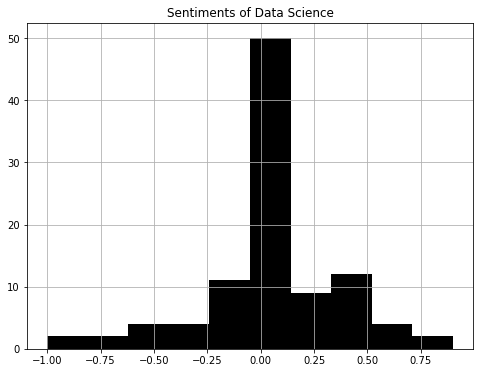

In [14]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram of the polarity values
df['polarity'].hist(bins=10,
             ax=ax,
             color="black")

plt.title("Sentiments of Data Science")
plt.show()

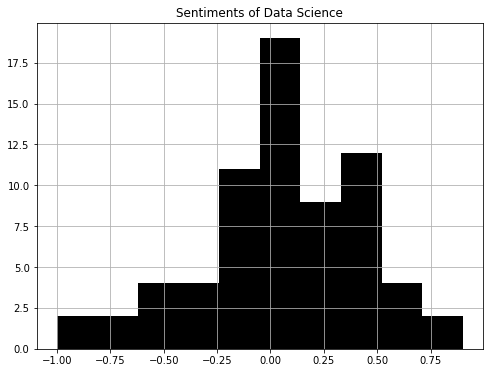

In [15]:
df = df[df['polarity'] != 0]
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram of the polarity values
df['polarity'].hist(bins=10,
             ax=ax,
             color="black")

plt.title("Sentiments of Data Science")
plt.show()

In [16]:
from nltk.tokenize import word_tokenize

In [17]:
df['tokenize'] = df['text_mod'].map(lambda x: word_tokenize(x))

In [18]:
df.head()

,created_at,text,text_mod,polarity,tokenize
0,Wed Jan 22 04:20:45 +0000 2020,This pup was having such a great weekend!!!\n....,This pup was having such a great weekenddog do...,0.400000,"[This, pup, was, having, such, a, great, weeke..."
2,Wed Jan 22 04:20:51 +0000 2020,RT @quenblackwell: I want to beat my uterus wi...,RT quenblackwell I want to beat my uterus with...,0.050000,"[RT, quenblackwell, I, want, to, beat, my, ute..."
3,Wed Jan 22 04:20:52 +0000 2020,"One of my cats died today, so I'm not feeling ...",One of my cats died today so Im not feeling ok...,0.150000,"[One, of, my, cats, died, today, so, Im, not, ..."
4,Wed Jan 22 04:20:52 +0000 2020,I’m officially a weird cat lady 🤷🏼‍♀️🤷🏼‍♀️🤷🏼‍♀️,Im officially a weird cat lady,-0.500000,"[Im, officially, a, weird, cat, lady]"
6,Wed Jan 22 04:20:54 +0000 2020,Then black cats looking 🔥 low key 🤔,Then black cats looking low key,-0.055556,"[Then, black, cats, looking, low, key]"


In [19]:
df_twitter = df

In [20]:
import os
print(os.path.basename('/Users/michael/Desktop/devmasters/day13-Twitter_HackDay/aclImdb/train/pos/'))

In [21]:
import glob
import pandas as pd
pos_train = glob.glob("aclImdb/train/pos/*.txt")
neg_train = glob.glob("aclImdb/train/neg/*.txt")
pos_test = glob.glob("aclImdb/test/pos/*.txt")
neg_test = glob.glob("aclImdb/test/neg/*.txt")

In [22]:
neg_train

['aclImdb/train/neg/1821_4.txt',
 'aclImdb/train/neg/10402_1.txt',
 'aclImdb/train/neg/1062_4.txt',
 'aclImdb/train/neg/9056_1.txt',
 'aclImdb/train/neg/5392_3.txt',
 'aclImdb/train/neg/2682_3.txt',
 'aclImdb/train/neg/3351_4.txt',
 'aclImdb/train/neg/399_2.txt',
 'aclImdb/train/neg/10447_1.txt',
 'aclImdb/train/neg/10096_1.txt',
 'aclImdb/train/neg/9850_1.txt',
 'aclImdb/train/neg/4392_3.txt',
 'aclImdb/train/neg/8056_1.txt',
 'aclImdb/train/neg/11890_1.txt',
 'aclImdb/train/neg/6435_3.txt',
 'aclImdb/train/neg/3253_3.txt',
 'aclImdb/train/neg/1125_3.txt',
 'aclImdb/train/neg/5518_1.txt',
 'aclImdb/train/neg/8487_1.txt',
 'aclImdb/train/neg/8013_1.txt',
 'aclImdb/train/neg/9248_3.txt',
 'aclImdb/train/neg/10424_2.txt',
 'aclImdb/train/neg/2780_4.txt',
 'aclImdb/train/neg/6470_3.txt',
 'aclImdb/train/neg/11447_1.txt',
 'aclImdb/train/neg/437_4.txt',
 'aclImdb/train/neg/12383_2.txt',
 'aclImdb/train/neg/9699_3.txt',
 'aclImdb/train/neg/9833_2.txt',
 'aclImdb/train/neg/7106_1.txt',
 'acl

In [23]:
def getlabeleddata(input_data):
    text_list = []
    
    for i in range(len(input_data)):
        fp = open(input_data[i],'r')
        text_list.append(fp.read())
        fp.close()
        
    return text_list
        

In [24]:
pos_train_df = pd.DataFrame(getlabeleddata(pos_train))
neg_train_df = pd.DataFrame(getlabeleddata(neg_train))
pos_test_df = pd.DataFrame(getlabeleddata(pos_test))
neg_test_df = pd.DataFrame(getlabeleddata(neg_test))

In [25]:
pos_train_df.head()

,0
0,For a movie that gets no respect there sure ar...
1,Bizarre horror movie filled with famous faces ...
2,"A solid, if unremarkable film. Matthau, as Ein..."
3,It's a strange feeling to sit alone in a theat...
4,"You probably all already know this by now, but..."


In [26]:
neg_train_df.head()

,0
0,Working with one of the best Shakespeare sourc...
1,"Well...tremors I, the original started off in ..."
2,Ouch! This one was a bit painful to sit throug...
3,"I've seen some crappy movies in my life, but t..."
4,"""Carriers"" follows the exploits of two guys an..."


In [27]:
pos_train_df['polarity'] = 1
neg_train_df['polarity'] = 0
pos_test_df['polarity'] = 1
neg_test_df['polarity'] = 0

In [28]:
pos_train_df.rename(columns={0: "text"}, inplace=True)
neg_train_df.rename(columns={0: "text"}, inplace=True)
pos_test_df.rename(columns={0: "text"}, inplace=True)
neg_test_df.rename(columns={0: "text"}, inplace=True)

In [29]:
neg_test_df.head()

,text,polarity
0,Alan Rickman & Emma Thompson give good perform...,0
1,I have seen this movie and I did not care for ...,0
2,"In Los Angeles, the alcoholic and lazy Hank Ch...",0
3,"This film is bundled along with ""Gli fumavano ...",0
4,I only comment on really very good films and o...,0


In [30]:
pos_test_df.head()

,text,polarity
0,"Based on an actual story, John Boorman shows t...",1
1,This is a gem. As a Film Four production - the...,1
2,"I really like this show. It has drama, romance...",1
3,This is the best 3-D experience Disney has at ...,1
4,"Of the Korean movies I've seen, only three had...",1


In [31]:
train = pd.concat([pos_train_df, neg_train_df])
train.head()

,text,polarity
0,For a movie that gets no respect there sure ar...,1
1,Bizarre horror movie filled with famous faces ...,1
2,"A solid, if unremarkable film. Matthau, as Ein...",1
3,It's a strange feeling to sit alone in a theat...,1
4,"You probably all already know this by now, but...",1


In [32]:
test = pd.concat([pos_test_df, neg_test_df])
test.head()

,text,polarity
0,"Based on an actual story, John Boorman shows t...",1
1,This is a gem. As a Film Four production - the...,1
2,"I really like this show. It has drama, romance...",1
3,This is the best 3-D experience Disney has at ...,1
4,"Of the Korean movies I've seen, only three had...",1


In [33]:
train.text.iloc[0]

'For a movie that gets no respect there sure are a lot of memorable quotes listed for this gem. Imagine a movie where Joe Piscopo is actually funny! Maureen Stapleton is a scene stealer. The Moroni character is an absolute scream. Watch for Alan "The Skipper" Hale jr. as a police Sgt.'

In [34]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [35]:
vect = CountVectorizer(stop_words='english')
word_count_vector=vect.fit_transform(train['text'])
word_count_vector.shape

(25000, 74538)

In [36]:
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(word_count_vector)

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

In [37]:
df_idf = pd.DataFrame(tfidf_transformer.idf_, index=vect.get_feature_names(), columns=["idf_weights"])
 
# sort ascending
df_idf.sort_values(by=['idf_weights'])

,idf_weights
movie,1.490279
br,1.533316
film,1.583867
like,1.761209
just,1.862316
...,...
novac,10.433524
novacaine,10.433524
crutchley,10.433524
cumparsita,10.433524


In [38]:
# count matrix
count_vector=vect.transform(train['text'])
 
# tf-idf scores
tf_idf_vector=tfidf_transformer.transform(count_vector)

In [39]:
feature_names = vect.get_feature_names()
 
#get tfidf vector for first document
first_document_vector=tf_idf_vector[0]
 
#print the scores
df = pd.DataFrame(first_document_vector.T.todense(), index=feature_names, columns=["tfidf"])
df.sort_values(by=["tfidf"],ascending=False)

,tfidf
moroni,0.304569
skipper,0.282387
stapleton,0.271620
stealer,0.269412
piscopo,0.267346
...,...
flats,0.000000
flatop,0.000000
flatness,0.000000
flatmates,0.000000


In [40]:
feature_names

['00',
 '000',
 '0000000000001',
 '00001',
 '00015',
 '000s',
 '001',
 '003830',
 '006',
 '007',
 '0079',
 '0080',
 '0083',
 '0093638',
 '00am',
 '00pm',
 '00s',
 '01',
 '01pm',
 '02',
 '020410',
 '029',
 '03',
 '04',
 '041',
 '05',
 '050',
 '06',
 '06th',
 '07',
 '08',
 '087',
 '089',
 '08th',
 '09',
 '0f',
 '0ne',
 '0r',
 '0s',
 '10',
 '100',
 '1000',
 '1000000',
 '10000000000000',
 '1000lb',
 '1000s',
 '1001',
 '100b',
 '100k',
 '100m',
 '100min',
 '100mph',
 '100s',
 '100th',
 '100x',
 '100yards',
 '101',
 '101st',
 '102',
 '102nd',
 '103',
 '104',
 '1040',
 '1040a',
 '1040s',
 '105',
 '1050',
 '105lbs',
 '106',
 '106min',
 '107',
 '108',
 '109',
 '10am',
 '10lines',
 '10mil',
 '10min',
 '10minutes',
 '10p',
 '10pm',
 '10s',
 '10star',
 '10th',
 '10x',
 '10yr',
 '11',
 '110',
 '1100',
 '11001001',
 '1100ad',
 '111',
 '112',
 '1138',
 '114',
 '1146',
 '115',
 '116',
 '117',
 '11f',
 '11m',
 '11th',
 '12',
 '120',
 '1200',
 '1200f',
 '1201',
 '1202',
 '123',
 '12383499143743701',
 '1

In [41]:
tf = pd.DataFrame(vect.fit_transform(train['text']).toarray(), columns=feature_names)

In [42]:
tf.head()

,00,000,0000000000001,00001,00015,000s,001,003830,006,007,...,était,état,étc,évery,êxtase,ís,ísnt,østbye,über,üvegtigris
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn import metrics

In [46]:
def tokenize_test(vect, xtrain_in, ytrain_in, xtest_in, ytest_in):
    x_train_dtm = vect.fit_transform(xtrain_in)
    x_test_dtm = vect.transform(xtest_in)

    model = MultinomialNB()
    model.fit(x_train_dtm, ytrain_in)
    y_pred_class = model.predict(x_test_dtm)
    print ('Accuracy: ', metrics.accuracy_score(ytest_in, y_pred_class))
    return model

In [47]:
model = tokenize_test(vect, train['text'], train['polarity'], test['text'], test['polarity'])

Accuracy:  0.81968


In [50]:
df_twitter.head()

,created_at,text,text_mod,polarity,tokenize
0,Wed Jan 22 04:20:45 +0000 2020,This pup was having such a great weekend!!!\n....,This pup was having such a great weekenddog do...,0.400000,"[This, pup, was, having, such, a, great, weeke..."
2,Wed Jan 22 04:20:51 +0000 2020,RT @quenblackwell: I want to beat my uterus wi...,RT quenblackwell I want to beat my uterus with...,0.050000,"[RT, quenblackwell, I, want, to, beat, my, ute..."
3,Wed Jan 22 04:20:52 +0000 2020,"One of my cats died today, so I'm not feeling ...",One of my cats died today so Im not feeling ok...,0.150000,"[One, of, my, cats, died, today, so, Im, not, ..."
4,Wed Jan 22 04:20:52 +0000 2020,I’m officially a weird cat lady 🤷🏼‍♀️🤷🏼‍♀️🤷🏼‍♀️,Im officially a weird cat lady,-0.500000,"[Im, officially, a, weird, cat, lady]"
6,Wed Jan 22 04:20:54 +0000 2020,Then black cats looking 🔥 low key 🤔,Then black cats looking low key,-0.055556,"[Then, black, cats, looking, low, key]"


In [48]:
pwd

'/Users/michael/Desktop/devmasters/day13-Twitter_HackDay'